In [74]:
import subprocess
import time
import matplotlib.pyplot as plt


In [75]:
def execute_and_measure(program_path, cwd_path):
    start_time = time.time()
    subprocess.run([program_path], cwd=cwd_path)
    end_time = time.time()
    return end_time - start_time


In [76]:
trial_values = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


In [77]:
simple2_binary_path = "/home/ruben/Escritorio/Practicas/CAP/CAP/P1/simple2"
simple2_times = []
simple2_results = []
for value in trial_values:
    # Compile
    subprocess.run(["gcc", "-o", simple2_binary_path, "simple2.c"], cwd="/home/ruben/Escritorio/Practicas/CAP/CAP/P1")
    execution_times = []
    for i in range(0, 10):
        start_time = time.time()
        result = subprocess.run([simple2_binary_path, str(value)], cwd="/home/ruben/Escritorio/Practicas/CAP/CAP/P1", capture_output=True, text=True)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_time = execution_time * 1000
        execution_times.append(execution_time)
    
    execution_time = sum(execution_times) / len(execution_times)
    simple2_times.append(execution_time)
    simple2_results.append(result.stdout.strip())

In [78]:
print("Simple2 times: ", simple2_times)
print("Simple2 results: ", simple2_results)

Simple2 times:  [510.1203441619873, 978.8407564163208, 1451.3822078704834, 2169.72599029541, 2664.0275478363037, 3192.4071311950684, 3647.1585750579834, 4114.089131355286, 4707.472705841064, 5134.964752197266]
Simple2 results:  ['419451381762.394348', '838902763525.089600', '1258354145287.784912', '1677805527050.480225', '2097256908813.175537', '2516708290557.379883', '2936159672295.661133', '3355611054033.942383', '3775062435772.223633', '4194513817510.504883']


In [79]:
simple2_intrinsics_binary_path = "/home/ruben/Escritorio/Practicas/CAP/CAP/P1/simple2_intrinsics"
simple2_intrinsics_times = []
simple2_intrinsics_results = []
for value in trial_values:
    execution_times = []
    # Compile
    subprocess.run(["gcc", "-march=native", "-o", simple2_intrinsics_binary_path, "simple2_intrinsics.c"], cwd="/home/ruben/Escritorio/Practicas/CAP/CAP/P1")
    # Execute and measure time in ms
    for i in range(0, 10):
        start_time = time.time()
        result = subprocess.run([simple2_intrinsics_binary_path, str(value)], cwd="/home/ruben/Escritorio/Practicas/CAP/CAP/P1", capture_output=True, text=True)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_time = execution_time * 1000
        execution_times.append(execution_time)
    
    execution_time = sum(execution_times) / len(execution_times)
    simple2_intrinsics_times.append(execution_time)
    simple2_intrinsics_results.append(result.stdout.strip())

In [80]:
print("Simple2 intrinsics times: ", simple2_intrinsics_times)
print("Simple2 intrinsics results: ", simple2_intrinsics_results)

Simple2 intrinsics times:  [284.98756885528564, 546.3935375213623, 875.7282018661499, 1147.503900527954, 1418.7000751495361, 1696.9020366668701, 1965.1691913604736, 2268.043327331543, 2546.1278438568115, 2782.338523864746]
Simple2 intrinsics results:  ['419451381761.492554\nTime: 0.269003', '838902763524.185913\nTime: 0.535284', '1258354145286.888916\nTime: 0.998677', '1677805527049.584229\nTime: 1.108716', '2097256908812.279541\nTime: 1.395801', '2516708290575.006348\nTime: 1.649069', '2936159672337.701172\nTime: 1.940782', '3355611054100.396484\nTime: 2.334250', '3775062435863.091797\nTime: 2.458409', '4194513817625.787109\nTime: 2.760114']


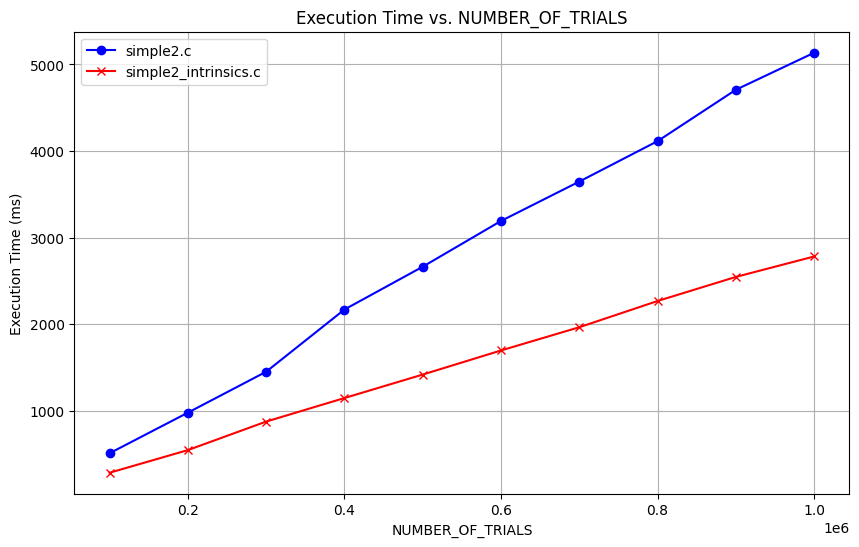

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(trial_values, simple2_times, marker='o', label="simple2.c", color='blue')
plt.plot(trial_values, simple2_intrinsics_times, marker='x', label="simple2_intrinsics.c", color='red')
plt.xlabel("NUMBER_OF_TRIALS")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Time vs. NUMBER_OF_TRIALS")
plt.legend()
plt.grid(True)
plt.show()
